<a href="https://colab.research.google.com/github/chikaj/7316/blob/main/geemap_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install geemap[all]

In [6]:
import ee
import geemap

In [7]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize(project='initial-test-project-485703')

In [9]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


In [10]:
# Import the Image function from the IPython.display module.
from IPython.display import Image

# Display a thumbnail of global elevation.
Image(url = dem.updateMask(dem.gt(0))
  .getThumbURL({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

In [21]:
# Import the geemap library.
import geemap

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a map object.
m = geemap.Map(center=[20, 0], zoom=3, ee_initialize=False)

# Add the elevation model to the map object.
m.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Display the map.
display(m)

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(child…

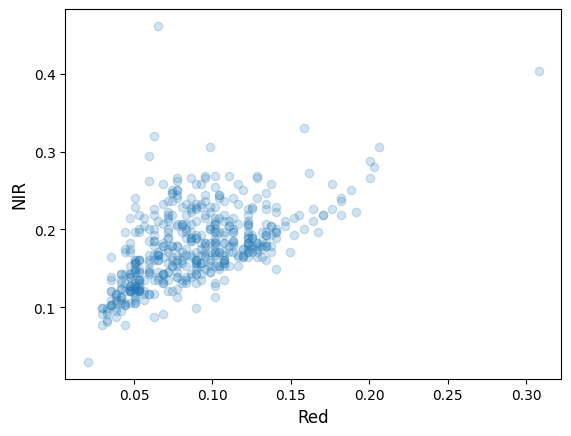

In [14]:
# Import the matplotlib.pyplot module.
import matplotlib.pyplot as plt

# Fetch a Landsat TOA image.
img = ee.Image('LANDSAT/LT05/C02/T1_TOA/LT05_034033_20000913')

# Select Red and NIR bands and sample 500 points.
samp_fc = img.select(['B3','B4']).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

In [16]:
Map = geemap.Map(center=(40, -100), zoom=4, ee_initialize=False)
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(ch…

In [17]:
landcover = ee.Image("ESA/GLOBCOVER_L4_200901_200912_V2_3").select('landcover')
landsat7 = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')
states = ee.FeatureCollection("TIGER/2018/States")

In [18]:
dem_vis = {
'min': 0,
'max': 4000,
'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

landsat_vis = {
    'min': 20,
    'max': 200,
    'bands': ['B4', 'B3', 'B2']
}

In [20]:
Map.addLayer(dem, dem_vis, 'SRTM DEM', True, 0.5)
Map.addLayer(landcover, {}, 'Land cover')
# Map.addLayer(landsat7, landsat_vis, 'Landsat 7')
Map.addLayer(states, {}, "US States")